In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#connecting to google drive
#Connecting to Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#Importing data from Google Drive into pandas dataframe while parsing dates as index
df_bitcoin = pd.read_csv("/content/gdrive/My Drive/Bitcoin.csv", parse_dates = ["date"], index_col = "date")
df_ethereum = pd.read_csv("/content/gdrive/My Drive/Ethereum.csv", parse_dates = ["date"], index_col = "date")
df_ripple = pd.read_csv("/content/gdrive/My Drive/Ripple.csv", parse_dates = ["date"], index_col = "date")

In [ ]:
#sorting datasets on date and removing unnecesarry column left behind by R studio
df_bitcoin = df_bitcoin.sort_index().drop(["Unnamed: 0", "target"], axis=1)
df_ethereum = df_ethereum.sort_index().drop(["Unnamed: 0", "target"], axis=1)
df_ripple = df_ripple.sort_index().drop(["Unnamed: 0", "target"], axis=1)



In [ ]:
df_bitcoin.head()

,open,high,low,close,volume,marketCap,articlesBitcoin,sentimentBitcoin,articlesBlockchain,sentimentBlockchain,articlesCryptocurrency,sentimentCryptocurrency,articlesCryptocurrencies,sentimentCryptocurrencies,trendBitcoin,trendBlockchain,trendCryptocurrency,trendCryptocurrencies,wikiBitcoin,wikiBlockchain,wikiCryptocurrency,wti,brent,EPU,vixClose
date,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01,963.66,1003.08,958.70,998.33,147775008.0,16050407461,243,-1.564698,10,-1.380042,0,0.000000,0,0.0,3,7,1,2,22579,2006,2389,52.36,55.05,2351,12.85
2017-01-02,998.62,1031.39,996.70,1021.75,222184992.0,16429024775,131,-1.128401,38,0.837092,0,0.000000,0,0.0,5,10,1,2,57742,3512,4827,52.36,55.05,24204,12.85
2017-01-03,1021.60,1044.08,1021.60,1043.84,185168000.0,16786368910,693,-0.865566,120,1.812371,24,-0.828760,0,0.0,4,15,1,3,62477,4672,5687,52.36,55.05,8985,12.85
2017-01-04,1044.40,1159.42,1044.40,1154.73,344945984.0,18571869009,869,-1.336908,181,2.519655,54,2.376397,0,0.0,5,15,1,2,55723,6338,5507,53.26,54.57,10199,11.85
2017-01-05,1156.73,1191.10,910.42,1013.38,510199008.0,16300254795,271,-0.953510,170,2.789309,30,2.119208,0,0.0,6,14,1,3,69010,5676,5916,53.77,54.99,13447,11.67


In [ ]:
#Changing column names to get nicer plots
column_names_bitcoin = df_bitcoin.columns
column_names_ethereum = df_ethereum.columns
column_names_ripple = df_ripple.columns

new_column_names_bitcoin = ["Bitcoin open", "Bitcoin high", "Bitcoin low", "Bitcoin close", "Bitcoin volume", "Bitcoin market capitalization", 
                            "Article count Bitcoin", "Tone Bitcoin", "Article count Blockchain", "Tone Blockchain", "Article count cryptocurrency", "Tone cryptocurrency", "Article count cryptocurrencies", "Tone cryptocurrencies",
                            "Google Trends Bitcoin", "Google Trends Blockchain", "Google Trends cryptocurrency", "Google Trends cryptocurrencies", 
                            "Wikipedia pageviews Bitcoin", "Wikipedia pageviews Blockchain", "Wikipedia pageviews cryptocurrency", 
                            "WTI", "Brent", "EPU", "VIX"]
new_column_names_ethereum = ["Ethereum open", "Ethereum high", "Ethereum low", "Ethereum close", "Ethereum volume", "Ethereum market capitalization", 
                            "Article count Ethereum", "Tone Ethereum", "Article count Blockchain", "Tone Blockchain", "Article count cryptocurrency", "Tone cryptocurrency", "Article count cryptocurrencies", "Tone cryptocurrencies",
                            "Google Trends Ethereum", "Google Trends Blockchain", "Google Trends cryptocurrency", "Google Trends cryptocurrencies", 
                            "Wikipedia pageviews Ethereum", "Wikipedia pageviews Blockchain", "Wikipedia pageviews cryptocurrency", 
                            "WTI", "Brent", "EPU", "VIX"]
new_column_names_ripple = ["Ripple open", "Ripple high", "Ripple low", "Ripple close", "Ripple volume", "Ripple market capitalization", 
                            "Article count Ripple", "Tone Ripple", "Article count Blockchain", "Tone Blockchain", "Article count cryptocurrency", "Tone cryptocurrency", "Article count cryptocurrencies", "Tone cryptocurrencies",
                            "Google Trends Ripple", "Google Trends Blockchain", "Google Trends cryptocurrency", "Google Trends cryptocurrencies", 
                            "Wikipedia pageviews Ripple", "Wikipedia pageviews Blockchain", "Wikipedia pageviews cryptocurrency", 
                            "WTI", "Brent", "EPU", "VIX"]

df_bitcoin.columns = new_column_names_bitcoin
df_ethereum.columns = new_column_names_ethereum
df_ripple.columns = new_column_names_ripple


In [ ]:
price_data = pd.concat([df_bitcoin["Bitcoin close"], df_ethereum["Ethereum close"], df_ripple["Ripple close"]], axis = 1)

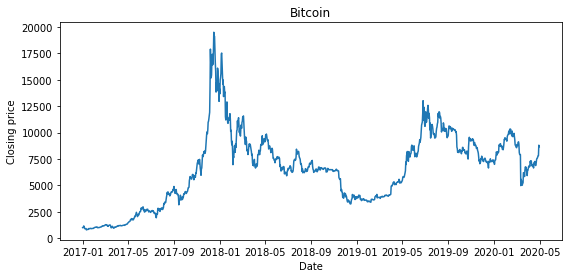

In [ ]:
fig, ax = plt.subplots(figsize = (9,4))
sns.lineplot(data = price_data["Bitcoin close"])
plt.title("Bitcoin")
plt.xlabel("Date")
plt.ylabel("Closing price")
fig.savefig("/content/gdrive/My Drive/Bitcoin price.png")


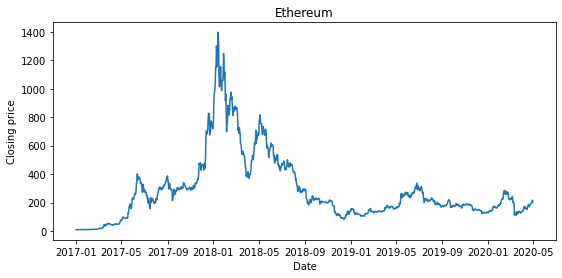

In [ ]:
fig, ax = plt.subplots(figsize = (9, 4))
sns.lineplot(data = price_data["Ethereum close"])
plt.title("Ethereum")
plt.xlabel("Date")
plt.ylabel("Closing price")
fig.savefig("/content/gdrive/My Drive/Ethereum price.png")

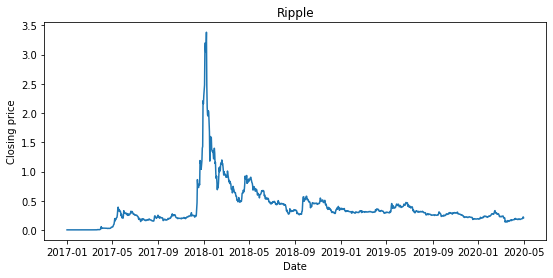

In [ ]:
fig, ax = plt.subplots(figsize = (9, 4))
sns.lineplot(data = price_data["Ripple close"])
plt.title("Ripple")
plt.xlabel("Date")
plt.ylabel("Closing price")
fig.savefig("/content/gdrive/My Drive/Ripple price.png")

In [ ]:
google_trend = pd.concat([df_bitcoin["Google Trends Bitcoin"], df_ethereum["Google Trends Ethereum"], df_ripple["Google Trends Ripple"], df_ripple["Google Trends Blockchain"], df_ripple["Google Trends cryptocurrency"], df_ripple["Google Trends cryptocurrencies"]], axis = 1)

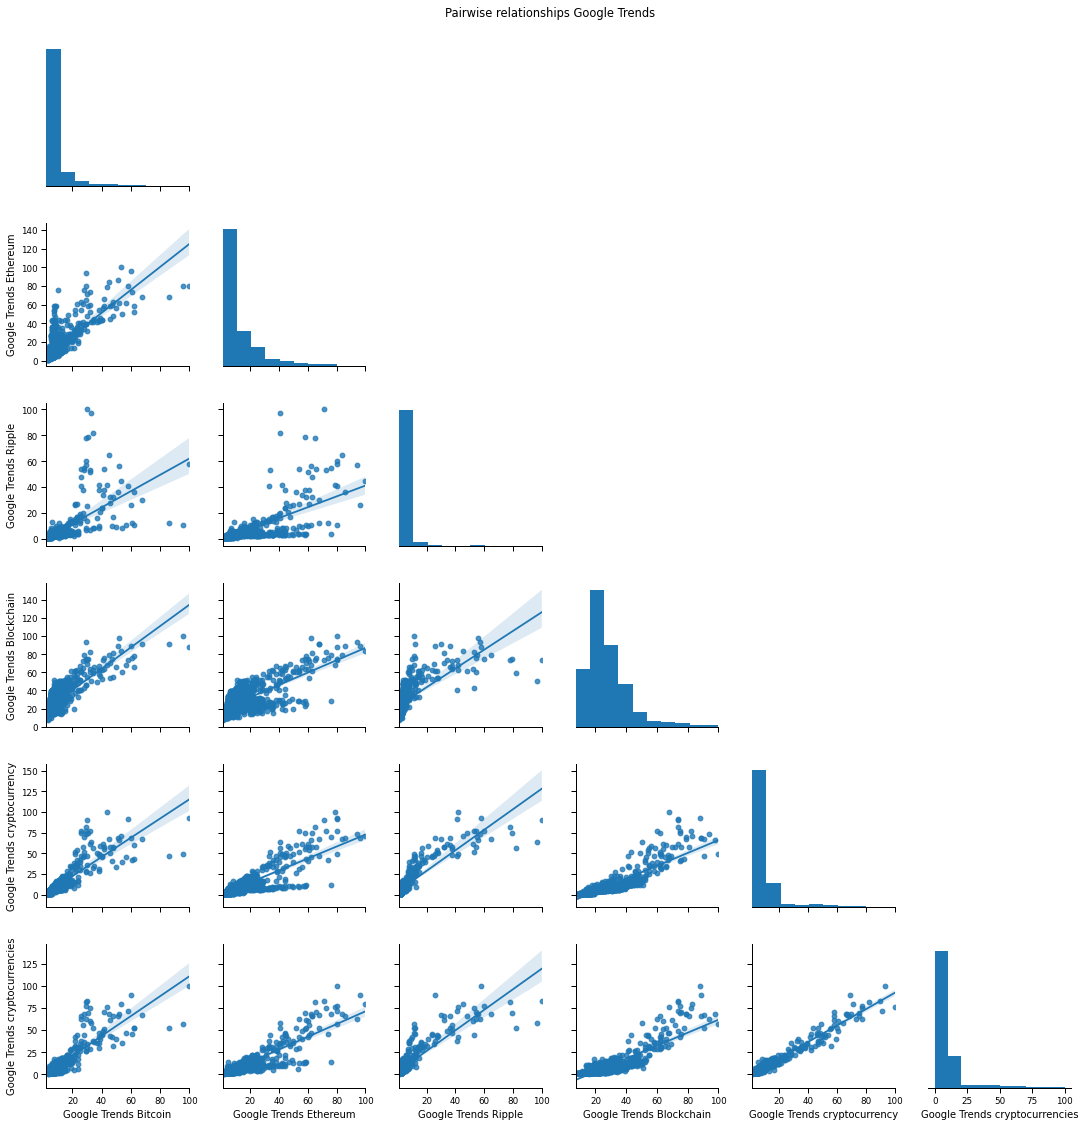

In [ ]:
fig = sns.pairplot(google_trend, kind = "reg", corner = True)
fig.fig.suptitle("Pairwise relationships Google Trends", y = 1.03)
fig.savefig("/content/gdrive/My Drive/Google Trends.png")



In [ ]:
wiki_trend = pd.concat([df_bitcoin["Wikipedia pageviews Bitcoin"], df_ethereum["Wikipedia pageviews Ethereum"], df_ripple["Wikipedia pageviews Ripple"], df_ripple["Wikipedia pageviews Blockchain"], df_ripple["Wikipedia pageviews cryptocurrency"]], axis = 1)

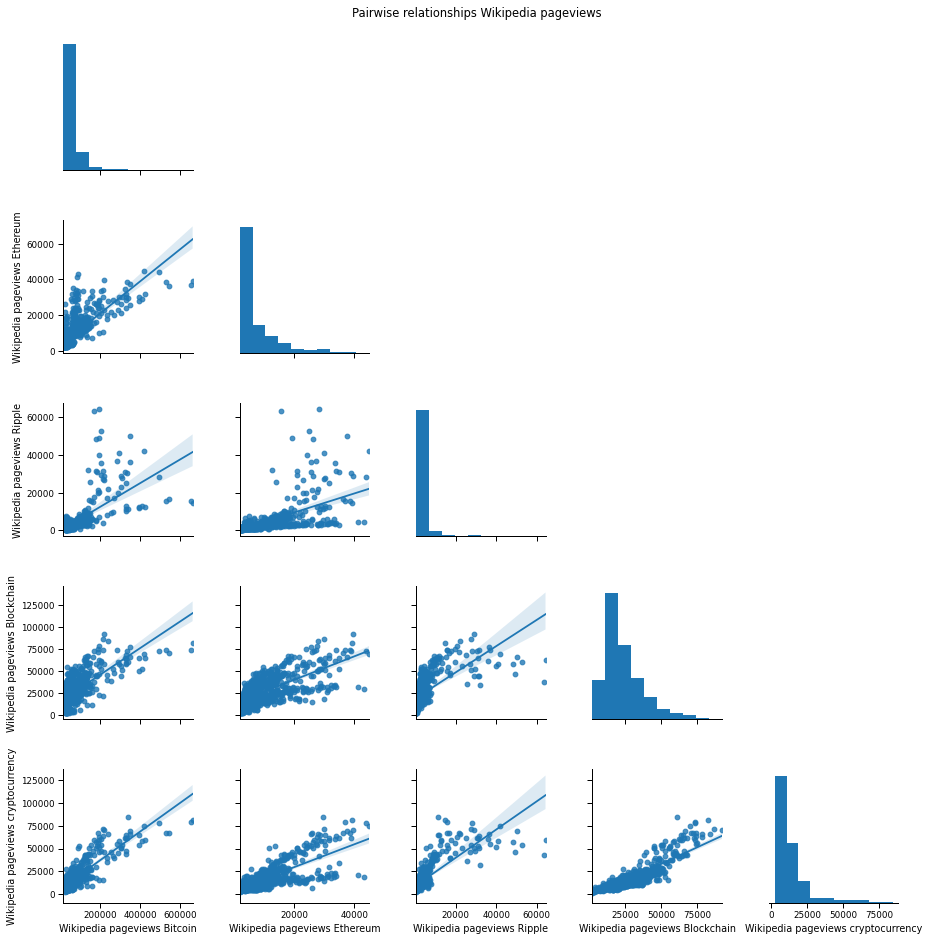

In [ ]:
fig = sns.pairplot(wiki_trend, kind = "reg", corner = True)
fig.fig.suptitle("Pairwise relationships Wikipedia pageviews", y = 1.03)
fig.savefig("/content/gdrive/My Drive/Wikipedia pageviews.png")

In [ ]:
sentiment = pd.concat([df_bitcoin["Tone Bitcoin"], df_ethereum["Tone Ethereum"], df_ripple["Tone Ripple"],
                       df_ripple["Tone Blockchain"], df_ripple["Tone cryptocurrency"], df_ripple["Tone cryptocurrencies"]], axis = 1)

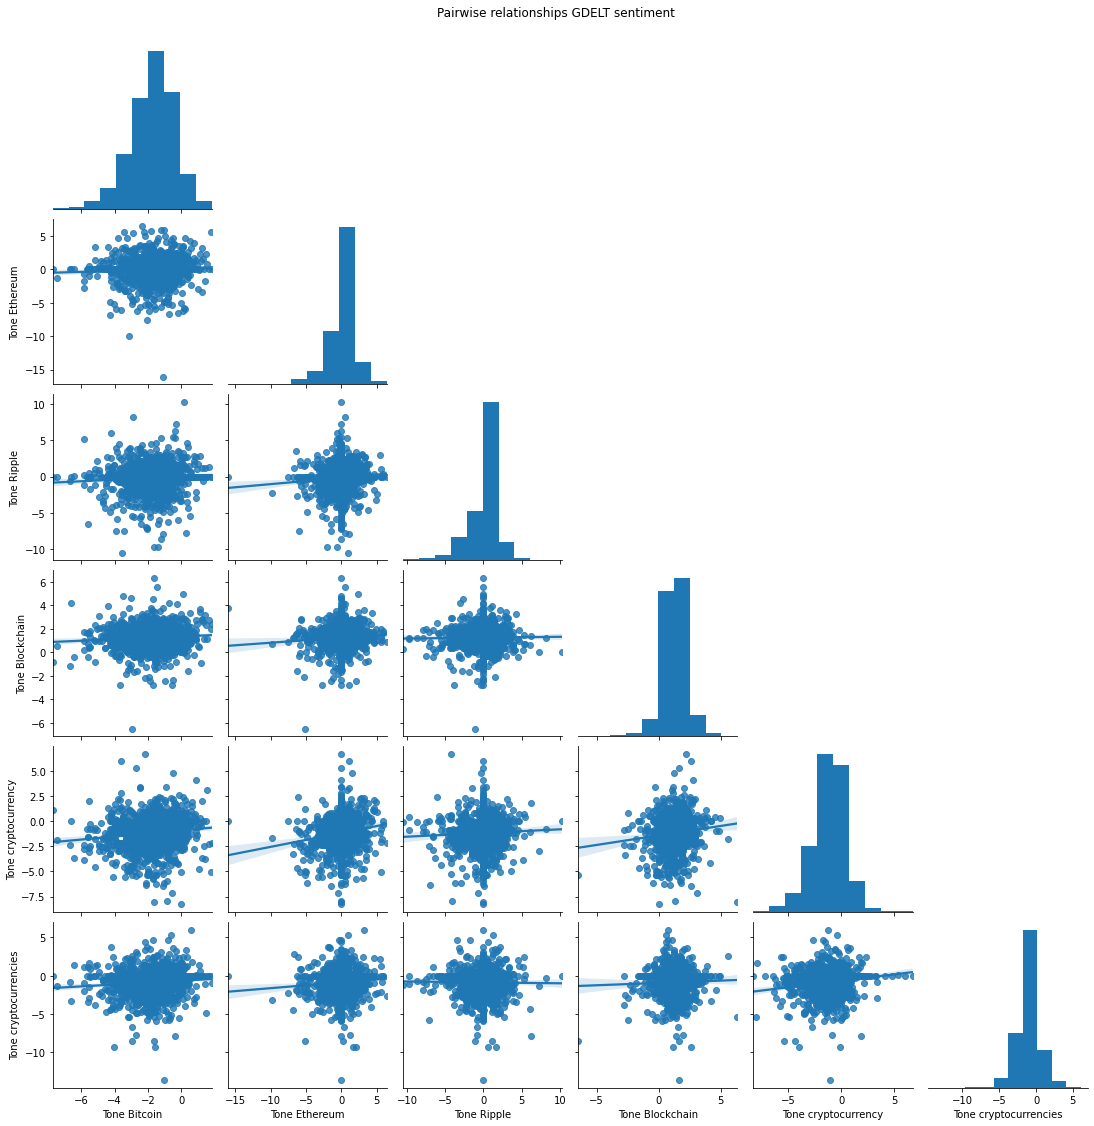

In [ ]:
fig = sns.pairplot(sentiment, kind = "reg", corner = True)
fig.fig.suptitle("Pairwise relationships GDELT sentiment", y = 1.03)
fig.savefig("/content/gdrive/My Drive/GDELT Sentiment.png")

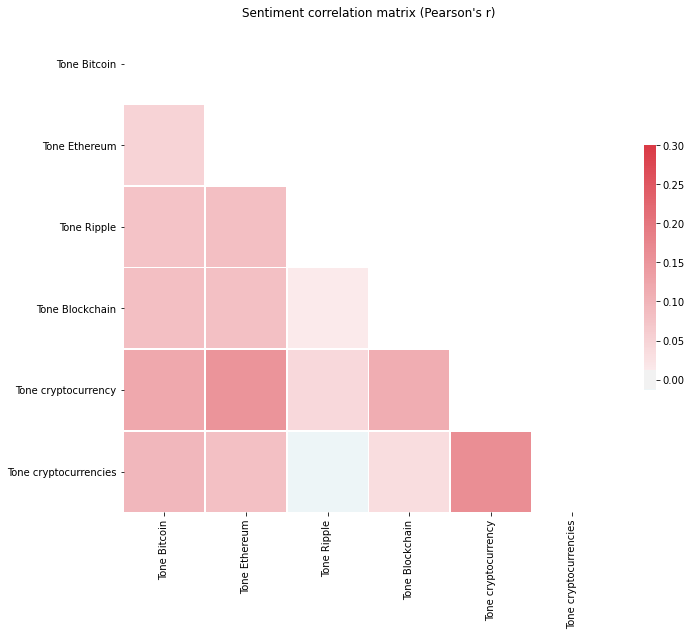

In [ ]:
corr = sentiment.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title("Sentiment correlation matrix (Pearson's r)")
fig.savefig("/content/gdrive/My Drive/sentiment scatter.png")

In [ ]:
articles = pd.concat([df_bitcoin["Article count Bitcoin"], df_ethereum["Article count Ethereum"], df_ripple["Article count Ripple"],
                       df_ripple["Article count Blockchain"], df_ripple["Article count cryptocurrency"], df_ripple["Article count cryptocurrencies"]], axis = 1)

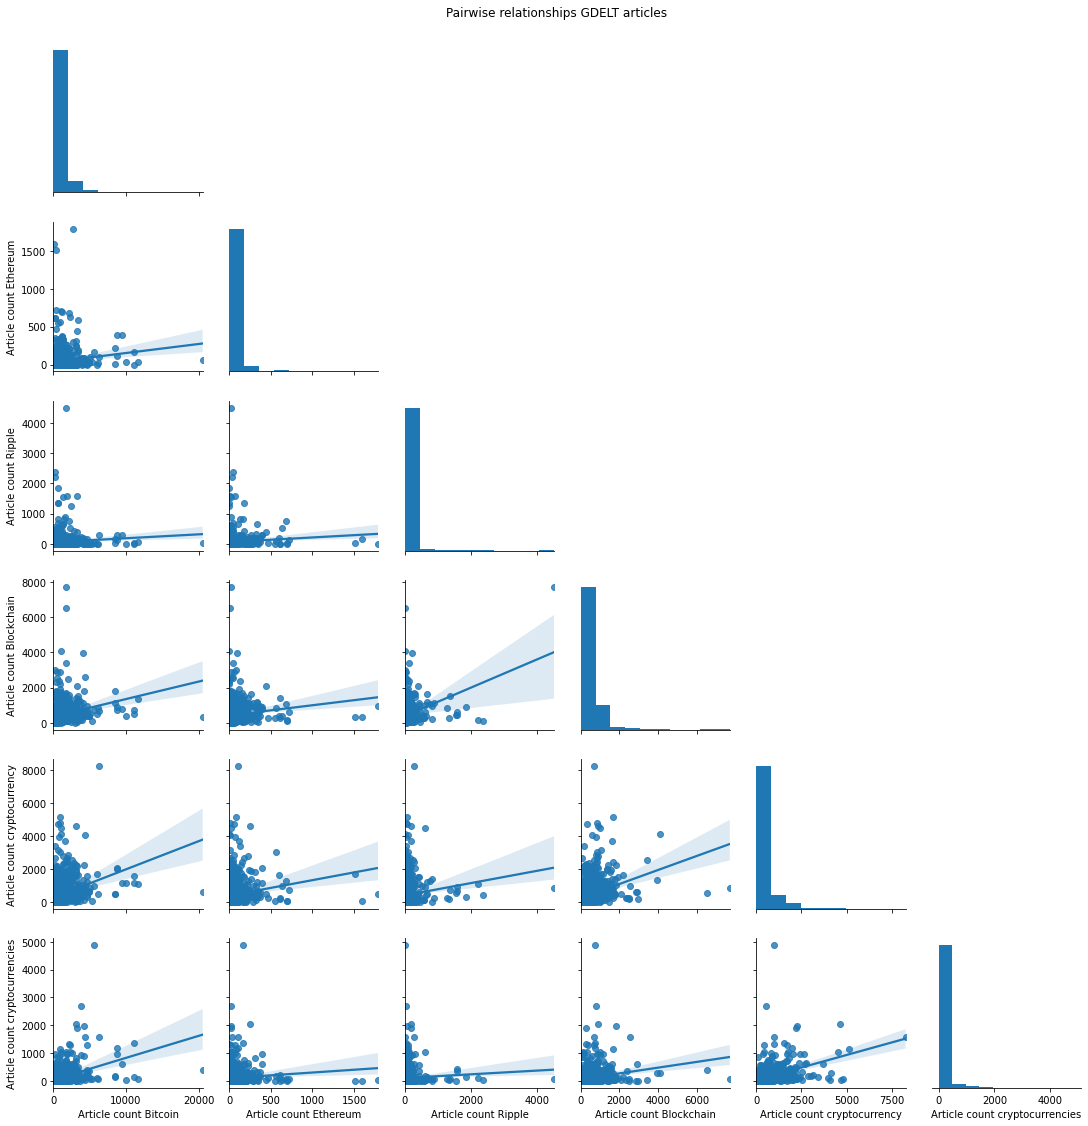

In [ ]:
fig = sns.pairplot(articles, kind = "reg", corner = True)
fig.fig.suptitle("Pairwise relationships GDELT articles", y = 1.03)
fig.savefig("/content/gdrive/My Drive/GDELT articles.png")

In [ ]:
articles_sentiment =pd.concat([articles, sentiment], axis=1, join='inner')

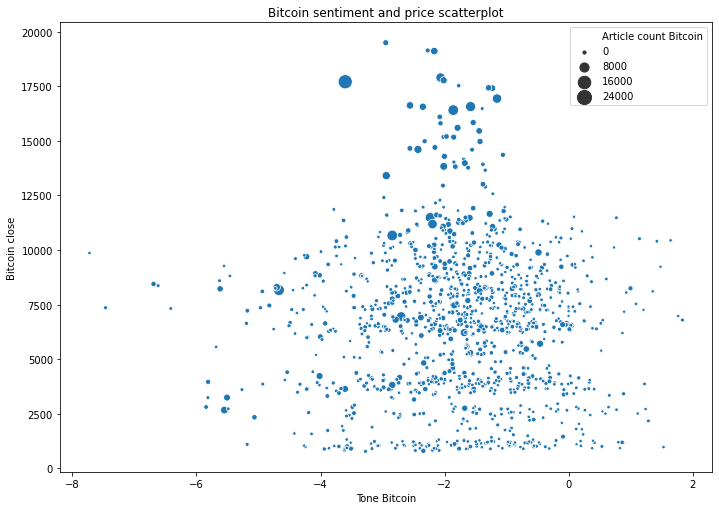

In [ ]:
fig, ax = plt.subplots(figsize=(11.69,8.27))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.scatterplot(x="Tone Bitcoin", y= price_data["Bitcoin close"],
                size="Article count Bitcoin",
                palette=cmap, sizes=(10, 200),
                data=articles_sentiment).set_title("Bitcoin sentiment and price scatterplot")
fig.savefig("/content/gdrive/My Drive/Sentiment scatterplot Bitcoin.png")


In [ ]:
fig, ax = plt.subplots(figsize=(11.69,8.27))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.scatterplot(x="Tone Ethereum", y= price_data["Ethereum close"],
                size="Article count Ethereum",
                palette=cmap, sizes=(10, 200),
                data=articles_sentiment).set_title("Ethereum sentiment and price scatterplot")
fig.savefig("/content/gdrive/My Drive/Sentiment scatterplot Ethereum.png")


In [ ]:
fig, ax = plt.subplots(figsize=(11.69,8.27))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.scatterplot(x="Tone Ripple", y= price_data["Ripple close"],
                size="Article count Ripple",
                palette=cmap, sizes=(10, 200),
                data=articles_sentiment).set_title("Ripple sentiment and price scatterplot")
fig.savefig("/content/gdrive/My Drive/Sentiment scatterplot Ripple.png")

In [ ]:
corr = sentiment.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title("Tone correlation matrix (Pearson's r)")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.yticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
fig.savefig("/content/gdrive/My Drive/sentiment scatter.png")

In [ ]:
corr = df_bitcoin.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title("Bitcoin correlation matrix (Pearson's r)")
ax.figure.subplots_adjust(left = 0.3, bottom = 0.3) #in order not to get truncated labels
fig.savefig("/content/gdrive/My Drive/bitcoin scatter.png")

In [ ]:
corr = df_ethereum.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title("Ethereum Correlation matrix (Pearson's r)")
ax.figure.subplots_adjust(left = 0.3, bottom = 0.3) #in order not to get truncated labels
fig.savefig("/content/gdrive/My Drive/ethereum scatter.png")

In [ ]:
corr = df_ripple.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig, ax = plt.subplots(figsize=(11.69,8.27))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title("Ripple Correlation matrix (Pearson's r)")
ax.figure.subplots_adjust(left = 0.3, bottom = 0.3) #in order not to get truncated labels
fig.savefig("/content/gdrive/My Drive/ripple scatter.png")

In [ ]:
grid = sns.FacetGrid(df, col="walk", hue="walk", palette="tab20c",
                     col_wrap=4, height=1.5)
grid.map(plt.plot, "step", "position", marker="o")

grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))
grid.fig.tight_layout(w_pad=1)

In [ ]:
#sns.set(style="whitegrid")



# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(titanic, y_vars="survived", #F1 score
                 x_vars=["class", "sex", "who", "alone"], # Bitcoin small, Bitcoin Big ....
                 height=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

In [ ]:
#sns.set(style="whitegrid")



# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(titanic, y_vars="survived", #F1 score
                 x_vars=["class", "sex", "who", "alone"], # Bitcoin small, Bitcoin Big ....
                 height=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

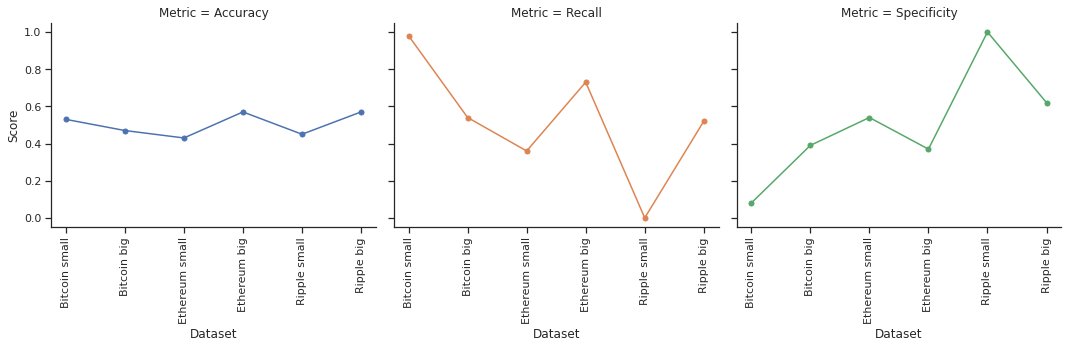

In [4]:
#making plots of all the metrics acieved by each LSTM model
sns.set(style="ticks")


metrics = ["Accuracy", "Recall", "Specificity"]
a = pd.DataFrame({"Score": [0.53, 0.47, 0.43, 0.57, 0.45, 0.57, #Score Accuracy
                            0.98, 0.54, 0.36, 0.73, 0, 0.52, #recall
                            0.08, 0.39, 0.54, 0.37, 1, 0.62], #specificity
                  "Dataset": [d for d in range(len(metrics)) for d in ["Bitcoin small", "Bitcoin big", "Ethereum small", "Ethereum big", "Ripple small", "Ripple big"]], 
                  "Metric": [metric for metric in metrics for i in range(6)]})

#mymean = a.groupby(["Name"])["Value"].mean()

grid = sns.FacetGrid(a, col = "Metric", hue = "Metric", col_wrap=3, height=5, sharey= True)
grid.map(plt.plot, "Dataset", "Score", marker="o", ms=5)
grid.set_xticklabels(rotation=90)
grid.fig.tight_layout(w_pad=1)
grid.fig.savefig("/content/gdrive/My Drive/metrics.pdf")

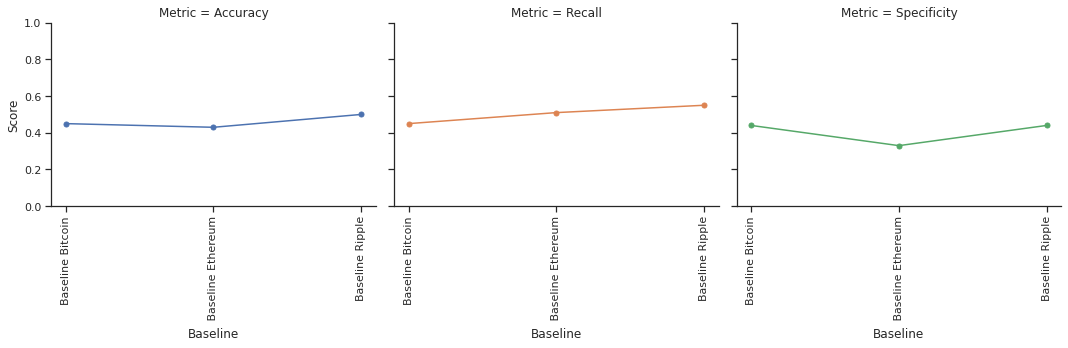

In [11]:
#making plots of all the metrics acieved by the baseline model
sns.set(style="ticks")


metrics = ["Accuracy", "Recall", "Specificity"]
a = pd.DataFrame({"Score": [0.45, 0.43, 0.50, #Score Accuracy
                            0.45, 0.51, 0.55, #recall
                            0.44, 0.33, 0.44], #specificity
                  "Baseline": [d for d in range(len(metrics)) for d in ["Baseline Bitcoin", " Baseline Ethereum", "Baseline Ripple"]], 
                  "Metric": [metric for metric in metrics for i in range(3)]})


grid = sns.FacetGrid(a, col = "Metric", hue = "Metric", col_wrap=3, height=5, sharey= True)
grid.map(plt.plot, "Baseline", "Score", marker="o", ms=5)
grid.set_xticklabels(rotation=90)
grid.set(ylim=(0, 1)) #in order to get same layout as plot for each model
grid.fig.tight_layout(w_pad=1)
grid.fig.savefig("/content/gdrive/My Drive/Baseline Metrics.pdf")